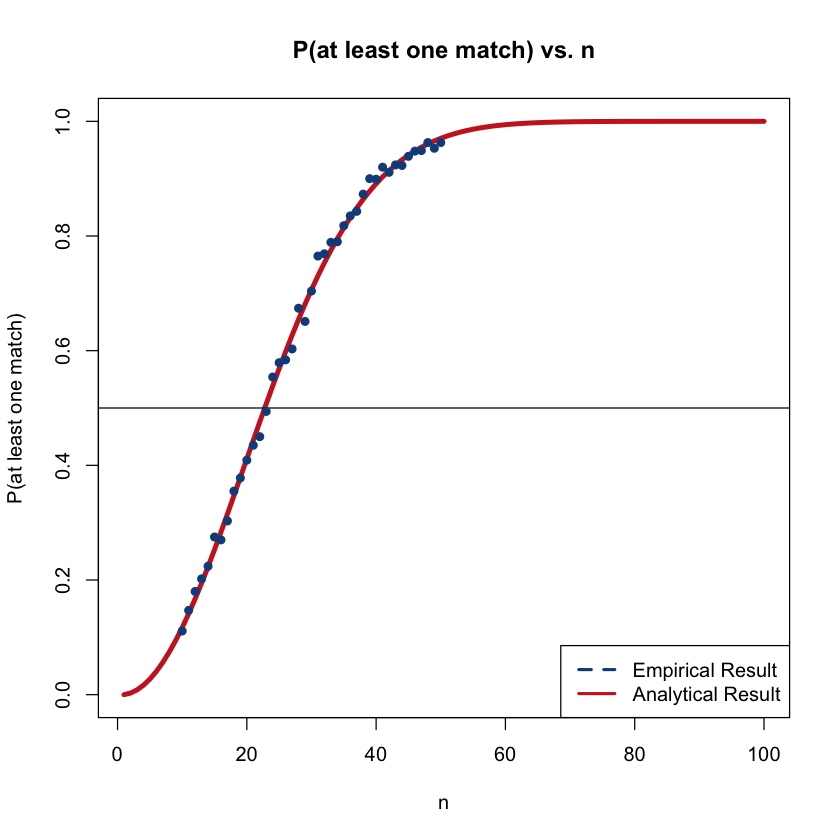

In [1]:
#replicate
set.seed(110)
sims = 1000

#define a function to calculate the analytical result
match.prob <- function(n){
  
  #define the vector in the numerator
  v = 365:(365 - n + 1)
  
  #return the correct probability
  return(1 - prod(v)/365^n)
}

#run from 10 to 50 people
people = 10:50

#keep track of the match probability
p.match = rep(NA, length(people))

#iterate over the people
for(j in 1:length(people)){
  
  #keep track of matches
  matches = rep(0, sims)
  
  #run the inner loop (actually generate birthdays)
  for(i in 1:sims){
    
    #generate the birthdays
    bdays = sample(1:365, people[j], replace = TRUE)
    
    #see if we got a match (i.e., less unique bdays than people)
    if(length(unique(bdays)) < people[j]){
      matches[i] = 1
    }
  }
  
  #track the mean
  p.match[j] = mean(matches)
}

#compare the plots
plot(1:100, sapply(1:100, function(x) match.prob(x)),
     main = "P(at least one match) vs. n",
     xlab = "n", ylab = "P(at least one match)",
     col = "firebrick3", type = "l",
     lwd = 4)
abline(h = 1/2, col = "black")

#plot the empirical result
lines(people, p.match, col = "dodgerblue4",
      lwd = 4, type = "p", pch = 16)

#add a legend
legend("bottomright", legend = c("Empirical Result", "Analytical Result"),
       lty=c(2,1), lwd=c(2.5,2.5),
       col=c("dodgerblue4", "firebrick3"))